# PySAL *segregation* module: dotmaps

This is an example notebook of functionalities for aspatial indexes of the *segregation* module. Firstly, we need to import the packages we need.

In [83]:
%matplotlib inline
import matplotlib.pyplot as plt

import geopandas as gpd
import segregation
import libpysal
import pointpats
import numpy as np

In [84]:
from geopandas import GeoSeries
from shapely.geometry import Point

Then it's time to load some data to estimate segregation. We use the data of 2000 Census Tract Data for the metropolitan area of Sacramento, CA, USA. 

We use a geopandas dataframe available in PySAL examples repository. We highlight that for nonspatial segregation measures only a pandas dataframe would also work to estimate.

For more information about the data: https://github.com/pysal/libpysal/tree/master/libpysal/examples/sacramento2

In [85]:
s_map = gpd.read_file(libpysal.examples.get_path("sacramentot2.shp"))
s_map.columns

Index(['FIPS', 'MSA', 'TOT_POP', 'POP_16', 'POP_65', 'WHITE_', 'BLACK_',
       'ASIAN_', 'HISP_', 'MULTI_RA', 'MALES', 'FEMALES', 'MALE1664',
       'FEM1664', 'EMPL16', 'EMP_AWAY', 'EMP_HOME', 'EMP_29', 'EMP_30',
       'EMP16_2', 'EMP_MALE', 'EMP_FEM', 'OCC_MAN', 'OCC_OFF1', 'OCC_INFO',
       'HH_INC', 'POV_POP', 'POV_TOT', 'HSG_VAL', 'FIPSNO', 'POLYID',
       'geometry'],
      dtype='object')

The data have several demographic variables. We are going to assess the segregation of the Hispanic Population (variable 'HISP_'). For this, we only extract some columns of the geopandas dataframe.

In [86]:
gdf = s_map[['geometry', 'HISP_', 'TOT_POP', 'ASIAN_', "BLACK_", 'WHITE_']]

We also can plot the spatial distribution of the composition of the Hispanic population over the tracts of Sacramento:

/home/serge/anaconda3/envs/pysaldev/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


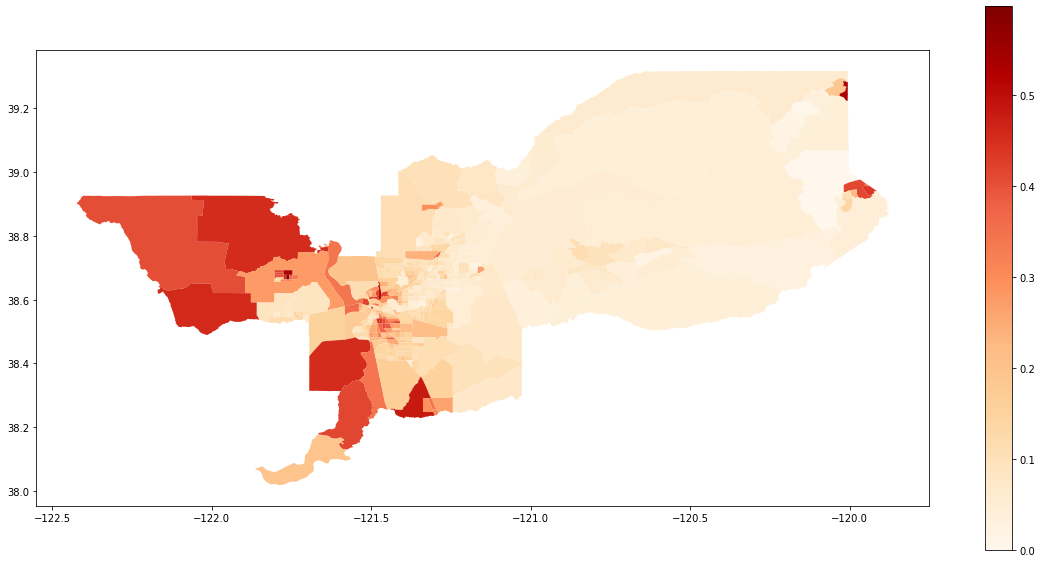

In [87]:
gdf['composition'] = gdf['HISP_'] / gdf['TOT_POP']

gdf.plot(column = 'composition',
         cmap = 'OrRd', 
         figsize=(20,10),
         legend = True)

In [88]:
units = gdf.geometry

In [89]:
u0 = units[0]

In [90]:
from pointpats import Window, PoissonPointProcess

In [91]:
window = Window(libpysal.cg.asShape(u0).parts)

In [92]:
samples1 = PoissonPointProcess(window, 10, 2, conditioning=False, asPP=False)


In [93]:
samples1.realizations[1]

array([[-120.01056709,   39.3067738 ],
       [-120.83925206,   39.20787948],
       [-120.25389751,   39.22186445],
       [-120.74832559,   39.19174438],
       [-120.1993875 ,   39.26362953],
       [-120.4599303 ,   39.28790192],
       [-120.63817275,   39.25534214],
       [-120.68106655,   39.25280476],
       [-120.5750556 ,   39.23539736],
       [-120.23696381,   39.25832183]])

In [94]:
def points_in_row(row, groups=['HISP_', 'BLACK_' ,'ASIAN_']):
    window = Window(libpysal.cg.asShape(row.geometry).parts)
    counts = row[groups]
    points = []
    print(counts)
    for count in counts:
        if count > 0:
            pnts = PoissonPointProcess(window, count, 1, conditioning=False, 
                                       asPP=False).realizations[0]
        else:
            pnts = np.array([[-999, -999]])
        points.append(pnts)
    return counts, points

In [95]:
h = []
b = []
a = []
for i, row in gdf.iterrows():
    print(i)
    counts, points = points_in_row(row)
    hi, bi, ai = points
    h.append(hi)
    b.append(bi)
    a.append(ai)

0
HISP_     336
BLACK_     29
ASIAN_     82
Name: 0, dtype: object
1
HISP_     391
BLACK_      0
ASIAN_     28
Name: 1, dtype: object
2
HISP_     1918
BLACK_       9
ASIAN_       0
Name: 2, dtype: object
3
HISP_     60
BLACK_     0
ASIAN_    55
Name: 3, dtype: object
4
HISP_     251
BLACK_     17
ASIAN_     13
Name: 4, dtype: object
5
HISP_     33
BLACK_     0
ASIAN_    19
Name: 5, dtype: object
6
HISP_      0
BLACK_    25
ASIAN_    16
Name: 6, dtype: object
7
HISP_     13
BLACK_     0
ASIAN_     9
Name: 7, dtype: object
8
HISP_     20
BLACK_     0
ASIAN_     0
Name: 8, dtype: object
9
HISP_     298
BLACK_      4
ASIAN_     18
Name: 9, dtype: object
10
HISP_     0
BLACK_    4
ASIAN_    0
Name: 10, dtype: object
11
HISP_     172
BLACK_      0
ASIAN_     55
Name: 11, dtype: object
12
HISP_     477
BLACK_      0
ASIAN_     72
Name: 12, dtype: object
13
HISP_     184
BLACK_      0
ASIAN_     21
Name: 13, dtype: object
14
HISP_     585
BLACK_      0
ASIAN_    291
Name: 14, dtype: object
15


120
HISP_     254
BLACK_     12
ASIAN_     35
Name: 120, dtype: object
121
HISP_     351
BLACK_     15
ASIAN_     76
Name: 121, dtype: object
122
HISP_     340
BLACK_      0
ASIAN_     19
Name: 122, dtype: object
123
HISP_     466
BLACK_     45
ASIAN_    135
Name: 123, dtype: object
124
HISP_     605
BLACK_    457
ASIAN_    236
Name: 124, dtype: object
125
HISP_     151
BLACK_     69
ASIAN_     33
Name: 125, dtype: object
126
HISP_     998
BLACK_    559
ASIAN_    223
Name: 126, dtype: object
127
HISP_     597
BLACK_    288
ASIAN_    204
Name: 127, dtype: object
128
HISP_     410
BLACK_    150
ASIAN_     88
Name: 128, dtype: object
129
HISP_     2212
BLACK_      75
ASIAN_     225
Name: 129, dtype: object
130
HISP_     196
BLACK_      7
ASIAN_     65
Name: 130, dtype: object
131
HISP_     2176
BLACK_       7
ASIAN_     155
Name: 131, dtype: object
132
HISP_     1020
BLACK_     277
ASIAN_     212
Name: 132, dtype: object
133
HISP_     628
BLACK_    339
ASIAN_    248
Name: 133, dtype: obje

235
HISP_     250
BLACK_    512
ASIAN_    154
Name: 235, dtype: object
236
HISP_     657
BLACK_    449
ASIAN_    292
Name: 236, dtype: object
237
HISP_     624
BLACK_    252
ASIAN_    162
Name: 237, dtype: object
238
HISP_     902
BLACK_    601
ASIAN_    345
Name: 238, dtype: object
239
HISP_     230
BLACK_     19
ASIAN_     64
Name: 239, dtype: object
240
HISP_     143
BLACK_     16
ASIAN_    214
Name: 240, dtype: object
241
HISP_      50
BLACK_     46
ASIAN_    213
Name: 241, dtype: object
242
HISP_     353
BLACK_    304
ASIAN_    194
Name: 242, dtype: object
243
HISP_      417
BLACK_     126
ASIAN_    1254
Name: 243, dtype: object
244
HISP_     276
BLACK_     24
ASIAN_     60
Name: 244, dtype: object
245
HISP_     1106
BLACK_     662
ASIAN_     493
Name: 245, dtype: object
246
HISP_     1147
BLACK_     181
ASIAN_     272
Name: 246, dtype: object
247
HISP_     1149
BLACK_      56
ASIAN_     271
Name: 247, dtype: object
248
HISP_     1925
BLACK_     239
ASIAN_     578
Name: 248, dtype

349
HISP_     1564
BLACK_    1109
ASIAN_     943
Name: 349, dtype: object
350
HISP_     1472
BLACK_    1777
ASIAN_    1202
Name: 350, dtype: object
351
HISP_     1550
BLACK_    1718
ASIAN_     677
Name: 351, dtype: object
352
HISP_     617
BLACK_    120
ASIAN_    384
Name: 352, dtype: object
353
HISP_      220
BLACK_     213
ASIAN_    1196
Name: 353, dtype: object
354
HISP_      297
BLACK_     241
ASIAN_    1020
Name: 354, dtype: object
355
HISP_      610
BLACK_     701
ASIAN_    1328
Name: 355, dtype: object
356
HISP_     2609
BLACK_    1481
ASIAN_     803
Name: 356, dtype: object
357
HISP_     585
BLACK_    563
ASIAN_    482
Name: 357, dtype: object
358
HISP_     517
BLACK_    440
ASIAN_    562
Name: 358, dtype: object
359
HISP_     325
BLACK_    105
ASIAN_    657
Name: 359, dtype: object
360
HISP_     1650
BLACK_    1782
ASIAN_    2095
Name: 360, dtype: object
361
HISP_     592
BLACK_      0
ASIAN_     39
Name: 361, dtype: object
362
HISP_     1202
BLACK_    1809
ASIAN_    2178
Name

In [96]:
def filter_zero(group):
    group = np.vstack(group)
    return group[np.where(group != -999)].reshape(-1,2)

In [97]:
ba = filter_zero(b)
ha = filter_zero(h)
aa = filter_zero(a)

In [98]:
h_gdf = gpd.GeoDataFrame(geometry = GeoSeries(map(Point, zip(ha[:,0], ha[:,1]))))
b_gdf = gpd.GeoDataFrame(geometry = GeoSeries(map(Point, zip(ba[:,0], ba[:,1]))))
a_gdf = gpd.GeoDataFrame(geometry = GeoSeries(map(Point, zip(aa[:,0], aa[:,1]))))

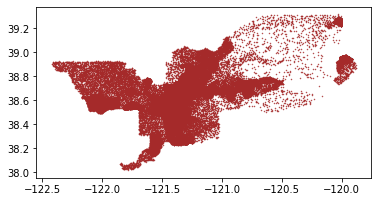

In [99]:
h_gdf.plot(markersize=0.2, color='brown')

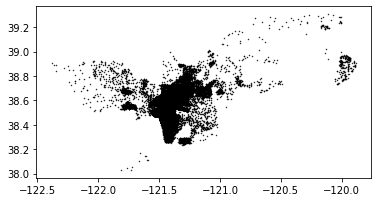

In [100]:
b_gdf.plot(markersize=0.2, color='black')

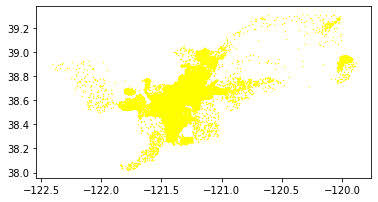

In [101]:
a_gdf.plot(markersize=0.2, color='yellow')

(-122.549289, -119.75000899999999, 37.9535193, 39.3813787)

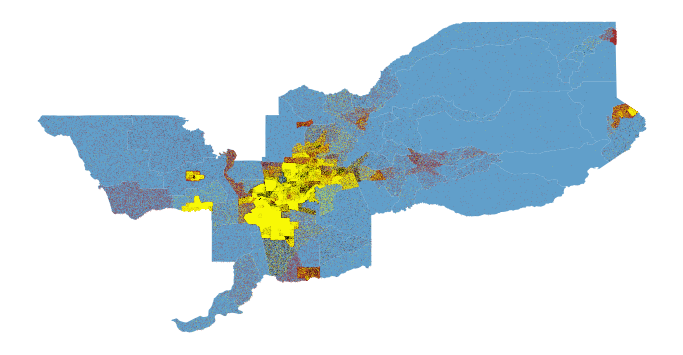

In [104]:
fig, ax = plt.subplots(1,1, figsize=(12,12))
gdf.plot(ax=ax,alpha=0.7)
h_gdf.plot(markersize=0.002, color='brown', ax=ax)
b_gdf.plot(markersize=0.002, color='black', ax=ax)
a_gdf.plot(markersize=0.002, color='yellow', ax=ax)

ax.axis('off')

## 1-dot = 10 individuals

In [106]:
n_a, _ = a_gdf.shape
n_b, _ = b_gdf.shape
n_h, _ = h_gdf.shape

In [107]:
n_a, n_b, n_h

(158820, 122022, 277574)

In [109]:
aid = list(range(0, n_a, 10))

In [115]:
a_gdf10 = a_gdf.iloc[aid]
h_gdf10 = h_gdf.iloc[list(range(0, n_h, 10))]
b_gdf10 = b_gdf.iloc[list(range(0, n_b, 10))]

(-122.549289, -119.75000899999999, 37.9535193, 39.3813787)

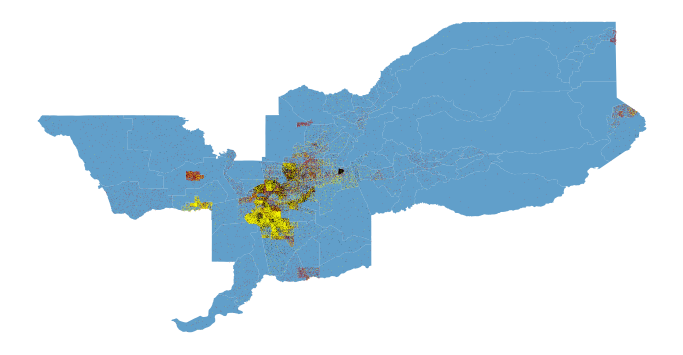

In [116]:
fig, ax = plt.subplots(1,1, figsize=(12,12))
gdf.plot(ax=ax,alpha=0.7)
h_gdf10.plot(markersize=0.002, color='brown', ax=ax)
b_gdf10.plot(markersize=0.002, color='black', ax=ax)
a_gdf10.plot(markersize=0.002, color='yellow', ax=ax)

ax.axis('off')

In [113]:
a_gdf10.shape

(15882, 1)

In [ ]:
import numpy as np

In [ ]:
h = np.vstack([h, h])

In [ ]:
h.shape

In [ ]:
h_gdf = gpd.GeoDataFrame(geometry=s)

In [ ]:
h_gdf.plot(markersize=1)

In [ ]:
b_gdf.plot(markersize=1, color='k')

In [ ]:
for cnt in points_in_row(row):
    print(cnt)

## Notation

For consistency of notation, we assume that $n_{ij}$ is the population of unit $i \in \{1, ..., I\}$ of group $j \in \{x, y\}$, also $\sum_{j}n_{ij} = n_{i.}$, $\sum_{i}n_{ij} = n_{.j}$, $\sum_{i}\sum_{j}n_{ij} = n_{..}$, $\tilde{s}_{ij} = \frac{n_{ij}}{n_{i.}}$, $\hat{s}_{ij} = \frac{n_{ij}}{n_{.j}}$. The segregation indexes can be build for any group $j$ of the data.

### Dissimilarity

Introduced by *Duncan, O. and B. Duncan (1955). A methodological analysis of segregation indexes. American Sociological Review 20, 210–17.*, the Dissimilarity Index (D) is given by:

\begin{equation}
D=\sum_{i=1}^{I}\frac{n_{i.}\mid \tilde{s}_{ij}-\frac{n_{.j}}{n_{..}}\mid}{2n_{..}\frac{n_{.j}}{n_{..}}\left ( 1-\frac{n_{.j}}{n_{..}} \right ).}
\end{equation}

$$0 \leqslant D \leqslant 1$$

The index is fitted below:

In [ ]:
from segregation.aspatial import Dissim
index = Dissim(gdf, 'HISP_', 'TOT_POP')
type(index)

All the **segregation** classes have the *statistic* and the *core_data* attributes. We can access the point estimation of D for the data set with the **statistic** attribute:

In [ ]:
index.statistic

The interpretation of this value is that 32.18% of the hispanic population would have to move to reach eveness in Sacramento.

### Gini

The Gini coefficient is given by:

\begin{equation}
G=\sum_{i_1=1}^{I}\sum_{i_2=1}^{I}\frac{n_{i_1.}n_{i_2.}\mid \tilde{s}_{ij}^{i_1}-\tilde{s}_{ij}^{i_2}\mid}{2n_{..}^2\frac{n_{.j}}{n_{..}}\left ( 1-\frac{n_{.j}}{n_{..}} \right )}
\end{equation}

The index is fitted below:

In [ ]:
from segregation.aspatial import GiniSeg
index = GiniSeg(gdf, 'HISP_', 'TOT_POP')
type(index)

In [ ]:
index.statistic

### Entropy 

The global entropy (E) is given by:

\begin{equation}
E = \frac{n_{.j}}{n_{..}} \ log\left ( \frac{1}{\frac{n_{.j}}{n_{..}}} \right )+\left ( 1-\frac{n_{.j}}{n_{..}} \right )log\left ( \frac{1}{1-\frac{n_{.j}}{n_{..}}} \right )
\end{equation}

while the unit's entropy is analogously:

\begin{equation}
E_i = \tilde{s}_ {ij} \ log\left ( \frac{1}{\tilde{s}_ {ij}} \right )+\left ( 1-\tilde{s}_ {ij} \right )log\left ( \frac{1}{1-\tilde{s}_ {ij}} \right ).
\end{equation}

Therefore, the entropy index (H) is given by:

\begin{equation}
H = \sum_{i=1}^{I}\frac{n_{i.}\left ( E-E_i \right )}{En_{..}}
\end{equation}

The index is fitted below:

In [ ]:
from segregation.aspatial import Entropy
index = Entropy(gdf, 'HISP_', 'TOT_POP')
type(index)

In [ ]:
index.statistic

### Atkinson

The Atkinson index (A) is given by:

\begin{equation}
A = 1 - \frac{\frac{n_{.j}}{n_{..}}}{1-\frac{n_{.j}}{n_{..}}}\left | \sum_{i=1}^{I}\left [ \frac{\left ( 1-\tilde{s}_{ij} \right )^{1-b}\tilde{s}_{ij}^bt_i}{\frac{n_{.j}}{n_{..}}n_{..}} \right ] \right |^{\frac{1}{1-b}}
\end{equation}
where $b$ is a shape parameter that determines how to weight the increments to segregation contributed by different portions of the Lorenz curve.

The index is fitted below (note you can modify the parameter *b*):

In [ ]:
from segregation.aspatial import Atkinson
index = Atkinson(gdf, 'HISP_', 'TOT_POP', b = 0.5)
type(index)

In [ ]:
index.statistic

### Concentration Profile

The Concentration Profile (R) measure is discussed in Hong, Seong-Yun, and Yukio Sadahiro. "Measuring geographic segregation: a graph-based approach." *Journal of Geographical Systems* 16.2 (2014): 211-231. and tries to inspect the evenness aspect of segregation. The threshold proportion $t$ is given by:

\begin{equation}
\upsilon_t = \frac{\sum_{i=1}^{I}n_{ij}g(t,i)}{\sum_{i=1}^{I}n_{ij}}.
\end{equation}

In the equation, $g(t, i)$ is a logical function that is defined as:

\begin{equation}
  g(t,i) =
  \begin{cases}
    1 & if \ \frac{n_{ij}}{n_{i.}} \geqslant t \\
    0 & \ otherwise.
  \end{cases}
\end{equation}

The Concentration Profile (R) is given by:

\begin{equation}
R=\frac{\frac{n_{.j}}{n_{..}}-\left ( \int_{t=0}^{\frac{n_{.j}}{n_{..}}}\upsilon_tdt - \int_{t=\frac{n_{.j}}{n_{..}}}^{1}\upsilon_tdt \right )}{1-\frac{n_{.j}}{n_{..}}}.
\end{equation}

The index is fitted below:

In [ ]:
from segregation.aspatial import ConProf
index = ConProf(gdf, 'HISP_', 'TOT_POP')
type(index)

In [ ]:
index.statistic

In addition, this index has a plotting method to see the profile estimated.

In [ ]:
index.plot()

### Isolation

Isolation (xPx) assess how much a minority group is only exposed to the same group. In other words, how much they only interact the members of the group that they belong. Assuming $j = x$ as the minority group, the isolation of $x$ is giving by:

\begin{equation}
xPx=\sum_{i=1}^{I}\left ( \hat{s}_{ix} \right )\left ( \tilde{s}_{ix} \right ).
\end{equation}

The index is fitted below:

In [ ]:
from segregation.aspatial import Isolation
index = Isolation(gdf, 'HISP_', 'TOT_POP')
type(index)

In [ ]:
index.statistic

The interpretation of this number is that if you randomly pick a hispanic person of a specific tract of Sacramento, there is 23.19% of probability that this member shares a unit with another hispanic.

### Exposure

The Exposure (xPy) of $x$ is giving by

\begin{equation}
xPy=\sum_{i=1}^{I}\left ( \hat{s}_{iy} \right )\left ( \tilde{s}_{iy} \right ).
\end{equation}

The index is fitted below:

In [ ]:
from segregation.aspatial import Exposure
index = Exposure(gdf, 'HISP_', 'TOT_POP')
type(index)

In [ ]:
index.statistic

The interpretation of this number is that if you randomly pick a hispanic person of a specific tract of Sacramento, there is 76.8% of probability that this member shares a unit with an nonhispanic.

### Correlation Ratio

The correlation ratio (V or $Eta^2$) is given by

\begin{equation}
V = Eta^2 = \frac{xPx - \frac{n_{.x}}{n_{..}}}{1 - \frac{n_{.x}}{n_{..}}}.
\end{equation}

The index is fitted below:

In [ ]:
from segregation.aspatial import CorrelationR
index = CorrelationR(gdf, 'HISP_', 'TOT_POP')
type(index)

In [ ]:
index.statistic

### Modified Dissimilarity 

The Modified Dissimilarity Index (Dct) based on Carrington, W. J., Troske, K. R., 1997. On measuring segregation in samples with small units. *Journal of Business & Economic Statistics* 15 (4), 402–409, evaluates the deviation from simulated evenness. This measure is estimated by taking the mean of the classical $D$ under several simulations under evenness from the global minority proportion.

Let $D^*$ be the average of the classical D under simulations draw assuming evenness from the global minority proportion. The value of Dct can be evaluated with the following equation: 

\begin{equation}
  Dct =
  \begin{cases}
    \frac{D-D^*}{1-D^*} & if \ D \geqslant D^* \\
    \frac{D-D^*}{D^*} & if \ D < D^*
  \end{cases}
\end{equation}

The index is fitted below (note you can change the number of simulations):

In [ ]:
from segregation.aspatial import ModifiedDissim
index = ModifiedDissim(gdf, 'HISP_', 'TOT_POP', iterations = 500)
type(index)

In [ ]:
index.statistic

### Modified Gini

The Modified Gini (Gct) based also on Carrington, W. J., Troske, K. R., 1997. On measuring segregation in samples with small units. *Journal of Business & Economic Statistics* 15 (4), 402–409, evaluates the deviation from simulated evenness. This measure is estimated by taking the mean of the classical G under several simulations under evenness from the global minority proportion.

Let $G^*$ be the average of G under simulations draw assuming evenness from the global minority proportion. The value of Gct can be evaluated with the following equation: 

\begin{equation}
  Gct =
  \begin{cases}
    \frac{G-G^*}{1-G^*} & if \ G \geqslant G^* \\
    \frac{G-G^*}{G^*} & if \ G < G^*
  \end{cases}
\end{equation}

The index is fitted below (note you can change the number of simulations):

In [ ]:
from segregation.aspatial import ModifiedGiniSeg
index = ModifiedGiniSeg(gdf, 'HISP_', 'TOT_POP', iterations = 500)
type(index)

In [ ]:
index.statistic

### Bias-Corrected Dissimilarity

The Bias-Corrected Dissimilarity (Dbc) index is presented in Allen, R., Burgess, S., Davidson, R., Windmeijer, F., 2015. More reliable inference for the dissimilarity index of segregation. *The econometrics journal* 18 (1), 40–66. The Dbc is given by:

\begin{equation}
    D_{bc} = 2D - \bar{D}_b
\end{equation}
where $\bar{D}_b$ is the average of $B$ resampling using the
observed conditional probabilities for a multinomial distribution for each group independently.

The index is fitted below (note you can change the value of B):

In [ ]:
from segregation.aspatial import BiasCorrectedDissim
index = BiasCorrectedDissim(gdf, 'HISP_', 'TOT_POP', B = 500)
type(index)

In [ ]:
index.statistic

### Density-Corrected Dissimilarity

The Density-Corrected Dissimilarity (Ddc) index is presented in Allen, R., Burgess, S., Davidson, R., Windmeijer, F., 2015. More reliable inference for the dissimilarity index of segregation. *The econometrics journal* 18 (1), 40–66. The Ddc measure is given by:

\begin{equation}
D_{dc} = \frac{1}{2}\sum_{i=1}^{I} \hat{\sigma}_{i} n\left ( \hat{\theta}_i \right )
\end{equation}

where

\begin{equation*}
\hat{\sigma}^2_i = \frac{\hat{s}_{ix} (1-\hat{s}_{ix})}{n_{.x}} + \frac{\hat{s}_{iy} (1-\hat{s}_{iy})}{n_{.y}} 
\end{equation*}

and $n\left ( \hat{\theta}_i \right )$ is the $\theta_i$ that maximizes the folded normal distribution $\phi(\hat{\theta}_i-\theta_i) + \phi(\hat{\theta}_i+\theta_i)$ where

\begin{equation*}
\hat{\theta_i} = \frac{\left | \hat{s}_{ix}-\hat{s}_{iy} \right |}{\hat{\sigma_i}}.
\end{equation*}

and $\phi$ is the standard normal density.

The index is fitted below (note you can change the tolerance of the optimization step):

In [ ]:
from segregation.aspatial import DensityCorrectedDissim
index = DensityCorrectedDissim(gdf, 'HISP_', 'TOT_POP', xtol = 1e-5)
type(index)

In [ ]:
index.statistic